# Descriptive Analytics with ChatGPT
Instuctor: [Yuxiao (Rain) Luo](https://yuxiaoluo.github.io)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YuxiaoLuo/AI_Intro/blob/main/ai_analytics_descriptive_week5_1.ipynb)

## Use ChatGPT to generate Python code

We try to explore the relationships among different variables in the review dataset (download [here](https://github.com/YuxiaoLuo/AI_Intro/blob/main/data/week4_Thu_PythonAnalytics_review%20data%20example.csv))

- Prompt example
>I would like to check correlation between two variables, Helpful and SalesUp, of “ReviewData.csv”.
Can you generate python code for this?

- Once you get the code
    1. take a careful look (see if the code makes sense)
    2. run it.

- If an error message is returned, do not get panicked.
    - Return to ChatGPT and then notify it of the returned error message (& ask for fixed code)

In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("data/week4_Thu_PythonAnalytics_review data example.csv")

# Calculate the correlation between "Helpful" and "SalesUp"
correlation = df["Helpful"].corr(df["SalesUp"])

# Print the result
print("Correlation between Helpful and SalesUp:", correlation)

Correlation between Helpful and SalesUp: 0.579242636746143


In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("data/week4_Thu_PythonAnalytics_review data example.csv")

# Calculate the correlation between "Helpful" and "SalesUp"
correlation_helpful_sales = df["Helpful"].corr(df["SalesUp"])
print("Correlation between Helpful and SalesUp:", correlation_helpful_sales)

# Calculate the correlation between "Rating" and "SalesUp"
correlation_rating_sales = df["Rating"].corr(df["SalesUp"])
print("Correlation between Rating and SalesUp:", correlation_rating_sales)

Correlation between Helpful and SalesUp: 0.579242636746143
Correlation between Rating and SalesUp: -0.1491637915015328


Correlation between Helpful and SalesUp: 0.579242636746143
Correlation between Rating and SalesUp: -0.1491637915015328


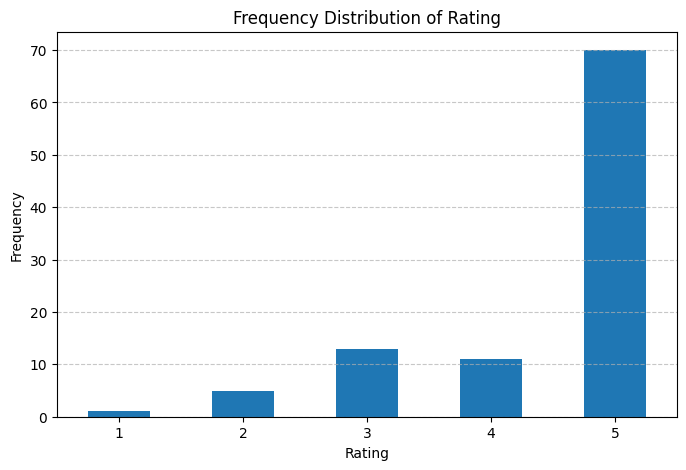

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("data/week4_Thu_PythonAnalytics_review data example.csv")

# Calculate the correlation between "Helpful" and "SalesUp"
correlation_helpful_sales = df["Helpful"].corr(df["SalesUp"])
print("Correlation between Helpful and SalesUp:", correlation_helpful_sales)

# Calculate the correlation between "Rating" and "SalesUp"
correlation_rating_sales = df["Rating"].corr(df["SalesUp"])
print("Correlation between Rating and SalesUp:", correlation_rating_sales)

# Generate the frequency distribution of "Rating"
plt.figure(figsize=(8, 5))
df["Rating"].value_counts().sort_index().plot(kind="bar")

# Customize the plot
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Rating")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


## General Descriptive Analytics Report by GenAI
We can also ask AI to generate Python code for a general descreiptive analytics and tune the specific analysis later.
- Prompt example
>Generate descriptive analysis for the dataset, including tables and plots. Return the Jupyter Notebook–ready Python code (cell-by-cell) for me.

Below, I will paste in the code blocks cell-be-cell generated by ChatGPT (e.g., GPT-5.2)

#### REMINDER: Ensure the accuracy of all results before sharing them with colleagues or submitting them to your manager.

In [2]:
# =========================
# CELL 1 — Imports + Load Data
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "data/week4_2_PythonAnalytics_review data example.csv"  # change if needed
df = pd.read_csv(file_path)

df.head()

,ReviewID,Date,ElapsedDays,Rating,Title,ReviewText,Length,Sentiment,Votes,Helpful,SalesUp,ReturnsUp,Image
0,r0001,1/12/2020,1714,5,Awesome,The color is a tad greener(turquoise) than it ...,69,positive,0,0,0,0,NaN
1,r0002,11/27/2019,1760,5,rad jacket.,Awesome winter jacket. Perfect for a wintery d...,18,positive,0,0,0,1,NaN
2,r0003,6/2/2019,1938,5,A fit that's hard to find,"I am 5'11"" and have a pretty solid, athletic b...",122,positive,0,0,0,0,NaN
3,r0004,1/17/2019,2074,5,awesome jacket!,this is my new fav jacket. it fits true to siz...,61,positive,2,1,1,0,12345.jpeg
4,r0005,11/17/2019,1770,3,yeahhuh,"i'm a small person, a very small person, about...",76,negative,0,0,0,1,NaN


In [3]:
# =========================
# CELL 2 — Shape, Data Types, Missing Values
# =========================
print("Dataset shape:", df.shape)

display(df.dtypes)

missing_counts = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean() * 100).round(2).sort_values(ascending=False)

display(pd.DataFrame({"MissingCount": missing_counts, "MissingPct": missing_pct}))

Dataset shape: (100, 13)


ReviewID         str
Date             str
ElapsedDays    int64
Rating         int64
Title            str
ReviewText       str
Length         int64
Sentiment        str
Votes          int64
Helpful        int64
SalesUp        int64
ReturnsUp      int64
Image            str
dtype: object

,MissingCount,MissingPct
Image,99,99.0
Date,0,0.0
ElapsedDays,0,0.0
Rating,0,0.0
ReviewID,0,0.0
Title,0,0.0
ReviewText,0,0.0
Sentiment,0,0.0
Length,0,0.0
Votes,0,0.0


In [4]:
# =========================
# CELL 3 — Parse Date (optional but useful)
# =========================
df["Date_parsed"] = pd.to_datetime(df["Date"], errors="coerce")

print("Parsed dates (non-null):", df["Date_parsed"].notna().sum(), "out of", len(df))
df[["Date", "Date_parsed"]].head()

Parsed dates (non-null): 100 out of 100


,Date,Date_parsed
0,1/12/2020,2020-01-12
1,11/27/2019,2019-11-27
2,6/2/2019,2019-06-02
3,1/17/2019,2019-01-17
4,11/17/2019,2019-11-17


In [5]:
# =========================
# CELL 4 — Column Groups + Descriptive Stats
# =========================
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical/Text columns:", cat_cols)

describe_num = df[num_cols].describe().T
describe_cat = df[cat_cols].describe().T

display(describe_num)
display(describe_cat)

Numeric columns: ['ElapsedDays', 'Rating', 'Length', 'Votes', 'Helpful', 'SalesUp', 'ReturnsUp']
Categorical/Text columns: ['ReviewID', 'Date', 'Title', 'ReviewText', 'Sentiment', 'Image', 'Date_parsed']


,count,mean,std,min,25%,50%,75%,max
ElapsedDays,100.0,1718.84,286.796543,1234.0,1512.00,1712.5,1918.25,2500.0
Rating,100.0,4.44,0.967346,1.0,4.00,5.0,5.00,5.0
Length,100.0,88.50,55.552414,4.0,49.25,77.5,122.75,307.0
Votes,100.0,0.63,1.252513,0.0,0.00,0.0,1.00,6.0
Helpful,100.0,0.31,0.464823,0.0,0.00,0.0,1.00,1.0
SalesUp,100.0,0.31,0.464823,0.0,0.00,0.0,1.00,1.0
ReturnsUp,100.0,0.13,0.337998,0.0,0.00,0.0,0.00,1.0


,count,mean,min,25%,50%,75%,max
Date_parsed,100,2020-01-07 03:50:24,2017-11-17 00:00:00,2019-06-21 18:00:00,2020-01-13 12:00:00,2020-08-01 00:00:00,2021-05-06 00:00:00


In [6]:
# =========================
# CELL 5 — Frequency Tables (Sentiment + Rating)
# =========================
if "Sentiment" in df.columns:
    sentiment_counts = df["Sentiment"].value_counts(dropna=False)
    sentiment_pct = (df["Sentiment"].value_counts(normalize=True, dropna=False) * 100).round(2)
    display(pd.DataFrame({"Count": sentiment_counts, "Percent": sentiment_pct}))

if "Rating" in df.columns:
    rating_counts = df["Rating"].value_counts(dropna=False).sort_index()
    rating_pct = (df["Rating"].value_counts(normalize=True, dropna=False).sort_index() * 100).round(2)
    display(pd.DataFrame({"Count": rating_counts, "Percent": rating_pct}))

,Count,Percent
Sentiment,,
positive,81,81.0
negative,19,19.0


,Count,Percent
Rating,,
1,1,1.0
2,5,5.0
3,13,13.0
4,11,11.0
5,70,70.0


In [7]:
# =========================
# CELL 6 — Helpful Rate + Engagement Summary
# =========================
if set(["Votes", "Helpful"]).issubset(df.columns):
    helpful_rate = df["Helpful"].mean()
    print(f"Helpful rate overall: {helpful_rate:.3f} ({helpful_rate*100:.1f}%)")

    voted = df[df["Votes"] > 0]
    if len(voted) > 0:
        helpful_rate_voted = voted["Helpful"].mean()
        print(f"Helpful rate among reviews with Votes > 0: {helpful_rate_voted:.3f} (n={len(voted)})")
    else:
        print("No reviews with Votes > 0.")

Helpful rate overall: 0.310 (31.0%)
Helpful rate among reviews with Votes > 0: 1.000 (n=31)


In [8]:
# =========================
# CELL 7 — Group Summaries + Crosstab
# =========================
group_metrics = [c for c in ["Rating", "Length", "Votes", "Helpful", "SalesUp", "ReturnsUp", "ElapsedDays"]
                 if c in df.columns]

if "Sentiment" in df.columns and group_metrics:
    group_by_sentiment = df.groupby("Sentiment")[group_metrics].mean().round(3)
    display(group_by_sentiment)

if "Rating" in df.columns and "Sentiment" in df.columns:
    sentiment_by_rating = pd.crosstab(df["Rating"], df["Sentiment"], margins=True)
    display(sentiment_by_rating)

,Rating,Length,Votes,Helpful,SalesUp,ReturnsUp,ElapsedDays
Sentiment,,,,,,,
negative,2.632,99.474,0.737,0.368,0.421,0.105,1776.211
positive,4.864,85.926,0.605,0.296,0.284,0.136,1705.383


Sentiment,negative,positive,All
Rating,,,
1,1,0,1
2,5,0,5
3,13,0,13
4,0,11,11
5,0,70,70
All,19,81,100


In [9]:
# =========================
# CELL 8 — Correlation Matrix (numeric only)
# =========================
if len(num_cols) >= 2:
    corr = df[num_cols].corr(numeric_only=True).round(3)
    display(corr)

,ElapsedDays,Rating,Length,Votes,Helpful,SalesUp,ReturnsUp
ElapsedDays,1.000,-0.124,-0.168,0.458,0.279,0.213,-0.165
Rating,-0.124,1.000,-0.074,-0.014,-0.014,-0.149,0.040
Length,-0.168,-0.074,1.000,0.061,0.098,0.067,-0.016
Votes,0.458,-0.014,0.061,1.000,0.754,0.546,-0.148
Helpful,0.279,-0.014,0.098,0.754,1.000,0.579,-0.131
SalesUp,0.213,-0.149,0.067,0.546,0.579,1.000,0.062
ReturnsUp,-0.165,0.040,-0.016,-0.148,-0.131,0.062,1.000


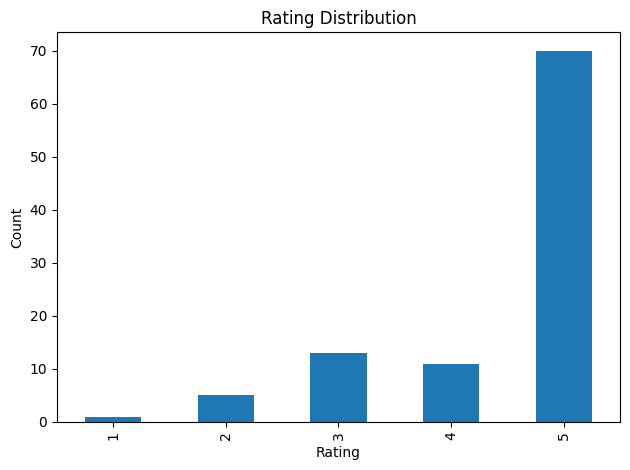

In [10]:
# =========================
# CELL 9 — Plots (Matplotlib only; no custom colors)
# =========================

# Rating distribution
if "Rating" in df.columns:
    plt.figure()
    df["Rating"].value_counts().sort_index().plot(kind="bar")
    plt.title("Rating Distribution")
    plt.xlabel("Rating")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

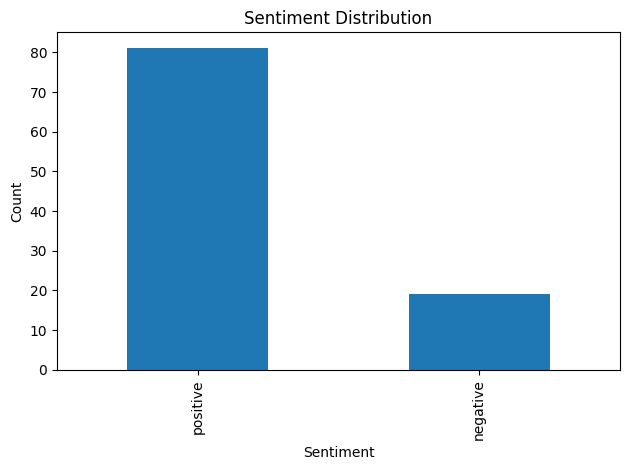

In [11]:
# Sentiment distribution
if "Sentiment" in df.columns:
    plt.figure()
    df["Sentiment"].value_counts().plot(kind="bar")
    plt.title("Sentiment Distribution")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

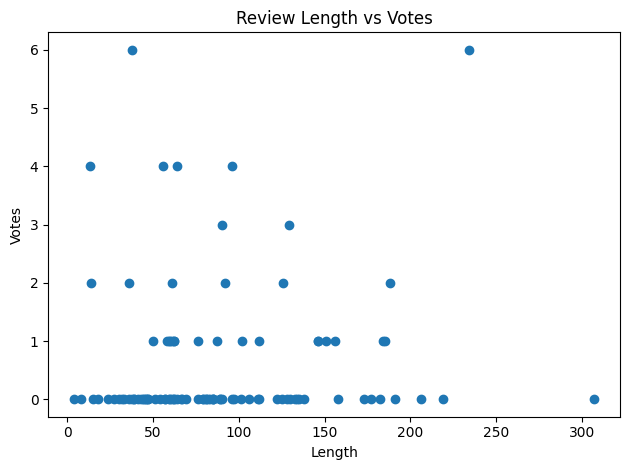

In [12]:
# Review length vs votes
if set(["Length", "Votes"]).issubset(df.columns):
    plt.figure()
    plt.scatter(df["Length"], df["Votes"])
    plt.title("Review Length vs Votes")
    plt.xlabel("Length")
    plt.ylabel("Votes")
    plt.tight_layout()
    plt.show()

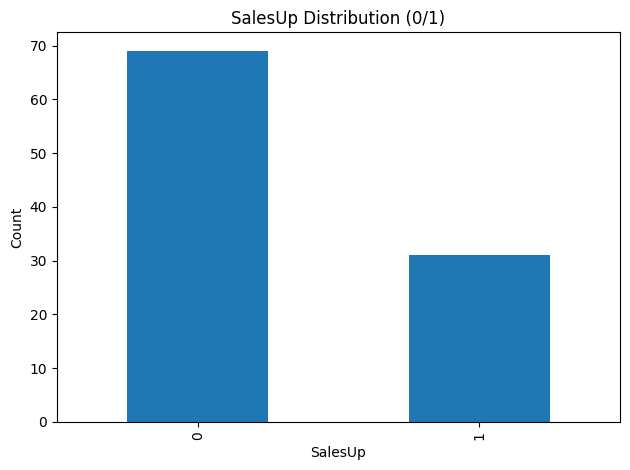

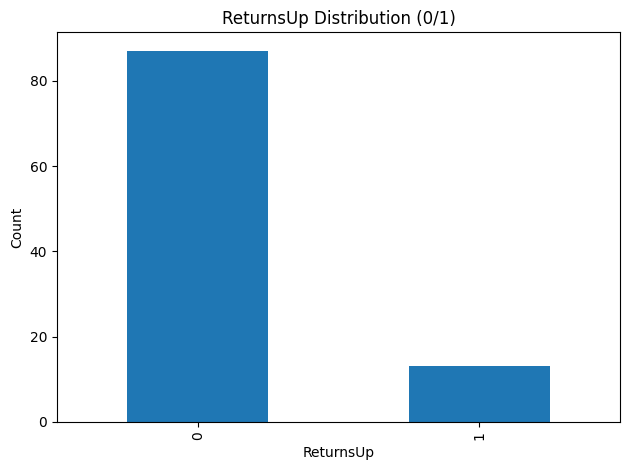

In [13]:
# SalesUp and ReturnsUp
for col in ["SalesUp", "ReturnsUp"]:
    if col in df.columns:
        plt.figure()
        df[col].value_counts().sort_index().plot(kind="bar")
        plt.title(f"{col} Distribution (0/1)")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()